In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#############################
### Policy Function Iteration
#############################

## Parameters

# Economics
nPeriods = 10
beta = 0.7

# Numerical
minX = 0
maxX = 20
Xstep = 0.5

# Plotting
sns.set_palette("Blues")

## Computing Function Values

# set up state space grid
grid = np.arange(minX,maxX,Xstep)

# set up policy space grid
fgrid = np.zeros((nPeriods,grid.shape[0]))

for n in range(fgrid.shape[0]):

    L = (1. - beta) / (1. - beta ** (n+1))
    fgrid[n,:] = L * grid

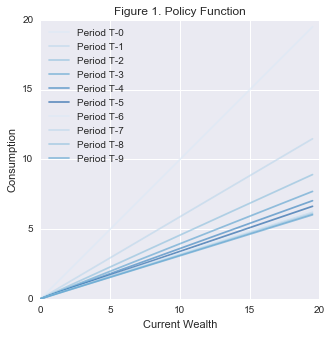

In [3]:
## Plotting

fig,ax=plt.subplots(figsize=(5,5))

sns.set_palette("Blues")

for n in range(fgrid.shape[0]):
    ax.plot(grid, fgrid[n,:], label='Period T-' + str(n), alpha=.6)

ax.set_xlabel('Current Wealth')
ax.set_ylabel('Consumption')

ax.set_title('Figure 1. Policy Function')
ax.legend(loc='best')

fig.savefig('PolicyFunctionIteration.png', dpi=100)

In [4]:
### Value Function Iteration

## Parameters

# Economics
nPeriods = 10
beta = 0.7
R = 1.01

# Numerical
minX = 0
maxX = 20
Xstep = 0.5

## Computing Function Values

# set up state space grid
grid = np.arange(minX,maxX,Xstep)

# set up value space grid
fgrid = np.zeros((nPeriods,grid.shape[0]))

for n in range(fgrid.shape[0]):

    C = sum([i * (beta ** i) for i in range(1,n+1)])
    f = lambda x: np.log((1-beta)*x) / (1-beta) + C * np.log(beta * R)
    fgrid[n,:] = [f(x) for x in grid]

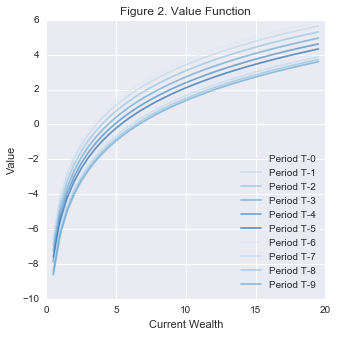

In [5]:
## Plotting


fig,ax=plt.subplots(figsize=(5,5))

for n in range(fgrid.shape[0]):
    ax.plot(grid, fgrid[n,:], label='Period T-' + str(n), alpha=.6)

ax.set_xlabel('Current Wealth')
ax.set_ylabel('Value')

ax.set_title('Figure 2. Value Function')
ax.legend(loc='best')

fig.savefig('ValueFunctionIteration.png', dpi=100)